In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
import csv

In [2]:
JFK_DA_data= "Detailed_Statistics_Departures-Delta JFK.csv"

In [3]:
JFK_DA_data_df = pd.read_csv(JFK_DA_data, header=6)

In [4]:
New_JFK_DA_data_df= JFK_DA_data_df[["Carrier Code", "Date (MM/DD/YYYY)", "Destination Airport", "Scheduled departure time",
                                   "Actual departure time", "Departure delay (Minutes)","Delay Carrier (Minutes)",
                                   "Delay Weather (Minutes)", "Delay National Aviation System (Minutes)",
                                   "Delay Security (Minutes)", "Delay Late Aircraft Arrival (Minutes)"
                                   ]]


New_JFK_DA_data_df.head()

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,DL,01/01/2017,FLL,19:35,20:07,32.0,0.0,0.0,0.0,0.0,0.0
1,DL,01/01/2017,LAX,18:22,18:22,0.0,0.0,0.0,0.0,0.0,0.0
2,DL,01/01/2017,ATL,15:29,15:30,1.0,0.0,0.0,0.0,0.0,0.0
3,DL,01/01/2017,SLC,16:00,16:03,3.0,0.0,0.0,0.0,0.0,0.0
4,DL,01/01/2017,ATL,19:25,19:38,13.0,0.0,0.0,0.0,0.0,0.0


In [5]:
New_JFK_DA_data_df.count()
New_JFK_DA_data_df = New_JFK_DA_data_df.dropna(how='any')

New_JFK_DA_data_df.count()

Carrier Code                                83916
Date (MM/DD/YYYY)                           83916
Destination Airport                         83916
Scheduled departure time                    83916
Actual departure time                       83916
Departure delay (Minutes)                   83916
Delay Carrier (Minutes)                     83916
Delay Weather (Minutes)                     83916
Delay National Aviation System (Minutes)    83916
Delay Security (Minutes)                    83916
Delay Late Aircraft Arrival (Minutes)       83916
dtype: int64

In [6]:
New_JFK_DA_data_df1=New_JFK_DA_data_df.groupby(['Date (MM/DD/YYYY)'],as_index=False).agg({'Departure delay (Minutes)':'sum'})

New_JFK_DA_data_df1

,Date (MM/DD/YYYY),Departure delay (Minutes)
0,01/01/2017,4.0
1,01/01/2018,940.0
2,01/01/2019,28.0
3,01/02/2017,999.0
4,01/02/2018,1452.0
...,...,...
998,12/29/2018,1108.0
999,12/30/2017,3278.0
1000,12/30/2018,248.0
1001,12/31/2017,397.0


In [7]:
delay_date_df=pd.DataFrame(New_JFK_DA_data_df1)
delay_date_df['Date'] = pd.to_datetime(delay_date_df['Date (MM/DD/YYYY)'])
delay_date_df_unsort=delay_date_df.drop(['Date (MM/DD/YYYY)'],axis=1)
delay_date_sort_df=delay_date_df_unsort.sort_values(by=['Departure delay (Minutes)'],ascending=False)
delay_date_sort_df

,Departure delay (Minutes),Date
910,14480.0,2018-11-15
912,11825.0,2018-11-16
314,11699.0,2019-04-15
19,11509.0,2018-01-07
372,10664.0,2017-05-05
...,...,...
85,-280.0,2018-01-29
340,-293.0,2018-04-24
86,-307.0,2019-01-29
172,-350.0,2018-02-27


In [8]:
final_date_df=delay_date_sort_df.head(20)
date = delay_date_sort_df.head(1)
date.iloc[0]['Date']

Timestamp('2018-11-15 00:00:00')

([<matplotlib.axis.XTick at 0x1a1713c610>,
 <a list of 20 Text xticklabel objects>)

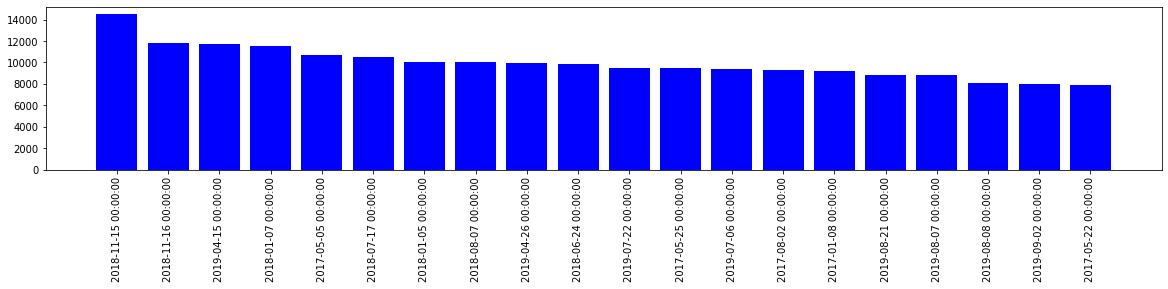

In [9]:
# Set x axis and tick locations
x_axis = np.arange(len(final_date_df))
tick_locations = [value for value in x_axis]
y_axis=final_date_df['Departure delay (Minutes)']
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
plt.xticks(tick_locations, final_date_df['Date'],rotation="vertical")

In [10]:
JFK_check_reason=New_JFK_DA_data_df.groupby(['Date (MM/DD/YYYY)'],as_index=False).sum()
JFK_check_reason['Date']= pd.to_datetime(JFK_check_reason['Date (MM/DD/YYYY)'])
JFK_check_reason
JFK_check_reason.to_csv("JFK_DA_date.csv",index=False)
JFK_check_reason

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,01/01/2017,4.0,69.0,0.0,116.0,0.0,80.0,2017-01-01
1,01/01/2018,940.0,279.0,104.0,81.0,0.0,159.0,2018-01-01
2,01/01/2019,28.0,83.0,0.0,55.0,0.0,29.0,2019-01-01
3,01/02/2017,999.0,345.0,0.0,688.0,0.0,176.0,2017-01-02
4,01/02/2018,1452.0,433.0,145.0,124.0,0.0,21.0,2018-01-02
...,...,...,...,...,...,...,...,...
998,12/29/2018,1108.0,580.0,0.0,287.0,0.0,179.0,2018-12-29
999,12/30/2017,3278.0,603.0,577.0,1736.0,0.0,1265.0,2017-12-30
1000,12/30/2018,248.0,134.0,0.0,111.0,0.0,42.0,2018-12-30
1001,12/31/2017,397.0,127.0,0.0,142.0,0.0,27.0,2017-12-31


In [11]:
JFK_check_reason_check=JFK_check_reason.loc[JFK_check_reason['Date']==date.iloc[0]['Date']]
JFK_check_reason_check

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
910,11/15/2018,14480.0,5555.0,6300.0,1823.0,0.0,1355.0,2018-11-15


In [12]:
JFK_check_reason_check.iloc[0][0]
n=JFK_check_reason_check.iloc[0].count()
JFK_check_reason_check.columns[5].split(" ")[0]
value =[]
heading=[]
for i in range(n-1):
    if JFK_check_reason_check.columns[i].split(" ")[0] == "Delay":
        print(JFK_check_reason_check.columns[i])
        value.append(JFK_check_reason_check.iloc[0][i])
        heading.append(JFK_check_reason_check.columns[i])

Delay Carrier (Minutes)
Delay Weather (Minutes)
Delay National Aviation System (Minutes)
Delay Security (Minutes)
Delay Late Aircraft Arrival (Minutes)


In [13]:
max(value)
value.index(max(value))
reason=heading[value.index(max(value))]
print("Reason for delay is {}".format(reason))

Reason for delay is Delay Weather (Minutes)


Text(0.5, 1.0, 'for date 2018-11-15, main reason for delay is Weather')

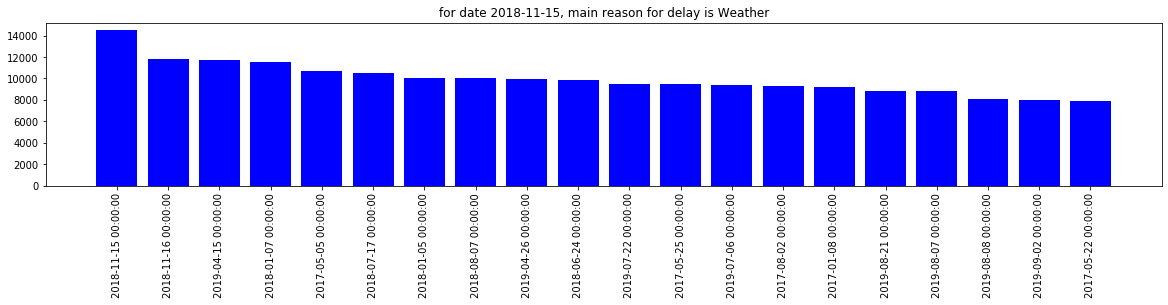

In [14]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
plt.xticks(tick_locations, final_date_df['Date'],rotation="vertical")
plt.title("for date {}, main reason for delay is {}".format(str(date.iloc[0]['Date']).split(" ")[0],reason.split(" ")[1]))

In [15]:
date1 = delay_date_sort_df.head(3)
date1

,Departure delay (Minutes),Date
910,14480.0,2018-11-15
912,11825.0,2018-11-16
314,11699.0,2019-04-15


In [16]:
JFK_check_reason_check=JFK_check_reason.loc[JFK_check_reason['Date']==date1.iloc[2]['Date']]
JFK_check_reason_check

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
314,04/15/2019,11699.0,996.0,41.0,11058.0,0.0,1400.0,2019-04-15


# Group by date and destination Airport


In [17]:
JFK_DA_data_final_des=New_JFK_DA_data_df.groupby(['Date (MM/DD/YYYY)','Destination Airport'],as_index=False).agg({'Departure delay (Minutes)':'sum'})
delay_date_des_df=pd.DataFrame(JFK_DA_data_final_des)
delay_date_des_df
delay_date_des_df.to_csv("JFK_DA_delay_date_des.csv",index=False)
delay_date_des_df

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes)
0,01/01/2017,ATL,88.0
1,01/01/2017,AUS,-2.0
2,01/01/2017,BOS,-22.0
3,01/01/2017,DEN,-8.0
4,01/01/2017,DTW,-5.0
...,...,...,...
25869,12/31/2018,SJU,-3.0
25870,12/31/2018,SLC,-9.0
25871,12/31/2018,SNA,-8.0
25872,12/31/2018,STT,-3.0


In [18]:
delay_date_des_df['Date'] = pd.to_datetime(delay_date_des_df['Date (MM/DD/YYYY)'])
delay_date_des_df

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Date
0,01/01/2017,ATL,88.0,2017-01-01
1,01/01/2017,AUS,-2.0,2017-01-01
2,01/01/2017,BOS,-22.0,2017-01-01
3,01/01/2017,DEN,-8.0,2017-01-01
4,01/01/2017,DTW,-5.0,2017-01-01
...,...,...,...,...
25869,12/31/2018,SJU,-3.0,2018-12-31
25870,12/31/2018,SLC,-9.0,2018-12-31
25871,12/31/2018,SNA,-8.0,2018-12-31
25872,12/31/2018,STT,-3.0,2018-12-31


In [19]:
delay_date_des_df_unsort=delay_date_des_df.drop(['Date (MM/DD/YYYY)'],axis=1)
delay_date_des_df_unsort

,Destination Airport,Departure delay (Minutes),Date
0,ATL,88.0,2017-01-01
1,AUS,-2.0,2017-01-01
2,BOS,-22.0,2017-01-01
3,DEN,-8.0,2017-01-01
4,DTW,-5.0,2017-01-01
...,...,...,...
25869,SJU,-3.0,2018-12-31
25870,SLC,-9.0,2018-12-31
25871,SNA,-8.0,2018-12-31
25872,STT,-3.0,2018-12-31


In [20]:
delay_date_des_sort_df=delay_date_des_df_unsort.sort_values(by=['Departure delay (Minutes)'],ascending=False)
delay_date_des_sort_plot_df=delay_date_des_sort_df.head(10)
JFK_DAcheck_des_reason=New_JFK_DA_data_df.groupby(['Date (MM/DD/YYYY)','Destination Airport'],as_index=False).sum()
JFK_DAcheck_des_reason['Date']= pd.to_datetime(JFK_DAcheck_des_reason['Date (MM/DD/YYYY)'])
JFK_DAcheck_des_reason
JFK_DAcheck_des_reason.to_csv("JFK_DA_delay_des_reason.csv",index=False)
JFK_DAcheck_des_reason



,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,01/01/2017,ATL,88.0,10.0,0.0,1.0,0.0,68.0,2017-01-01
1,01/01/2017,AUS,-2.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
2,01/01/2017,BOS,-22.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
3,01/01/2017,DEN,-8.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
4,01/01/2017,DTW,-5.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
...,...,...,...,...,...,...,...,...,...
25869,12/31/2018,SJU,-3.0,0.0,0.0,15.0,0.0,0.0,2018-12-31
25870,12/31/2018,SLC,-9.0,0.0,0.0,0.0,0.0,0.0,2018-12-31
25871,12/31/2018,SNA,-8.0,0.0,0.0,0.0,0.0,0.0,2018-12-31
25872,12/31/2018,STT,-3.0,0.0,0.0,0.0,0.0,0.0,2018-12-31


In [21]:
date1 = delay_date_des_sort_df.head(3)
date1.iloc[0]['Destination Airport']
JFK_DAcheck_reason_des_check=JFK_DAcheck_des_reason.loc[(JFK_DAcheck_des_reason['Destination Airport']==date1.iloc[0]['Destination Airport'])]
JFK_DAcheck_reason_des_check=JFK_DAcheck_reason_des_check[JFK_DAcheck_reason_des_check['Date']==date1.iloc[0]['Date']]
JFK_DAcheck_reason_des_check

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
18195,08/22/2019,LAX,2811.0,2106.0,42.0,20.0,0.0,478.0,2019-08-22


In [22]:
n=JFK_DAcheck_reason_des_check.iloc[0].count()
n
value_des=[]
heading_des=[]

for i in range(n-1):
    if JFK_DAcheck_reason_des_check.columns[i].split(" ")[0] == "Delay":
        print(JFK_DAcheck_reason_des_check.columns[i])
        value_des.append(JFK_DAcheck_reason_des_check.iloc[0][i])
        heading_des.append(JFK_DAcheck_reason_des_check.columns[i])

Delay Carrier (Minutes)
Delay Weather (Minutes)
Delay National Aviation System (Minutes)
Delay Security (Minutes)
Delay Late Aircraft Arrival (Minutes)


In [23]:
value_des
heading_des
max(value_des)
reason_des=heading_des[value_des.index(max(value_des))]
reason_des

'Delay Carrier (Minutes)'

Text(0.5, 1.0, 'Date 2019-08-22, main reason for delay is Carrier')

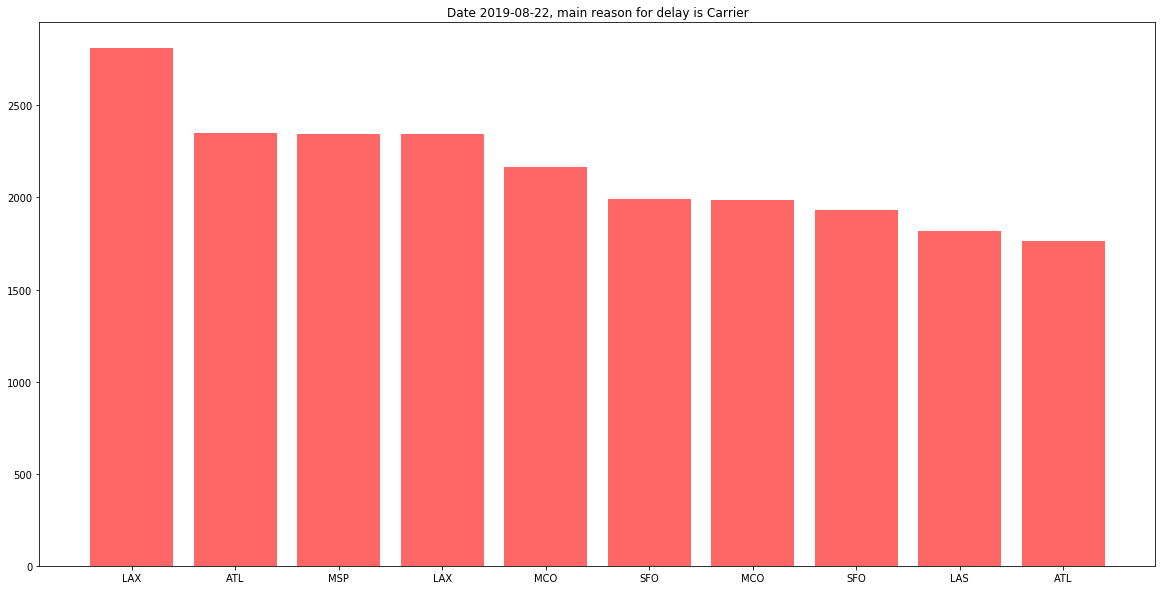

In [24]:
# Set x axis and tick locations
x_axis = np.arange(len(delay_date_des_sort_plot_df))
tick_locations = [value for value in x_axis]
y_axis=delay_date_des_sort_plot_df['Departure delay (Minutes)']

plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align="center")
plt.xticks(tick_locations, delay_date_des_sort_plot_df['Destination Airport'])
plt.title("Date {}, main reason for delay is {}".format(str(date1.iloc[0]['Date']).split(" ")[0],reason_des.split(" ")[1]))

In [25]:
# Set data
x_axis =JFK_check_reason['Departure delay (Minutes)']
print(x_axis)
y_axis =JFK_check_reason['Delay Weather (Minutes)']

0          4.0
1        940.0
2         28.0
3        999.0
4       1452.0
         ...  
998     1108.0
999     3278.0
1000     248.0
1001     397.0
1002      19.0
Name: Departure delay (Minutes), Length: 1003, dtype: float64


In [26]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

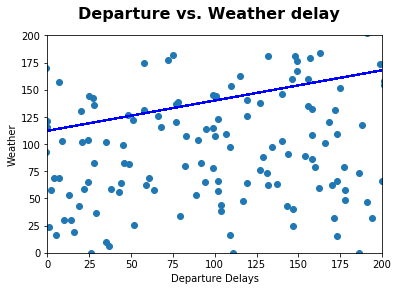

In [34]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs. Weather delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Weather")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [28]:
# Set data
x_axis = JFK_check_reason['Departure delay (Minutes)']
print(x_axis)
y_axis = JFK_check_reason['Delay Carrier (Minutes)']

0          4.0
1        940.0
2         28.0
3        999.0
4       1452.0
         ...  
998     1108.0
999     3278.0
1000     248.0
1001     397.0
1002      19.0
Name: Departure delay (Minutes), Length: 1003, dtype: float64


In [29]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

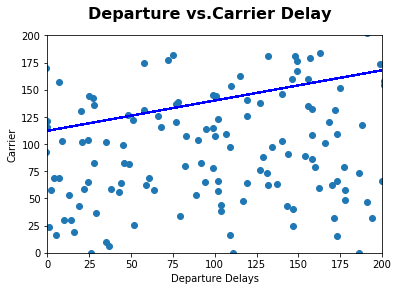

In [33]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Carrier Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Carrier")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [35]:
# Set data
x_axis = JFK_check_reason['Departure delay (Minutes)']
print(x_axis)
y_axis = JFK_check_reason['Delay National Aviation System (Minutes)']

0          4.0
1        940.0
2         28.0
3        999.0
4       1452.0
         ...  
998     1108.0
999     3278.0
1000     248.0
1001     397.0
1002      19.0
Name: Departure delay (Minutes), Length: 1003, dtype: float64


In [36]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

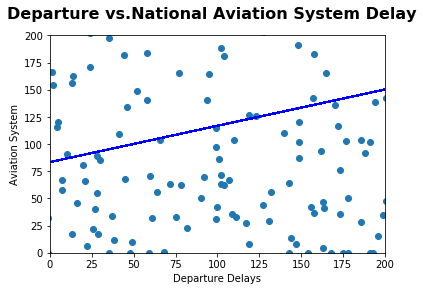

In [38]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.National Aviation System Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Aviation System")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [39]:
# Set data
x_axis = JFK_check_reason['Departure delay (Minutes)']
print(x_axis)
y_axis = JFK_check_reason['Delay Security (Minutes)']

0          4.0
1        940.0
2         28.0
3        999.0
4       1452.0
         ...  
998     1108.0
999     3278.0
1000     248.0
1001     397.0
1002      19.0
Name: Departure delay (Minutes), Length: 1003, dtype: float64


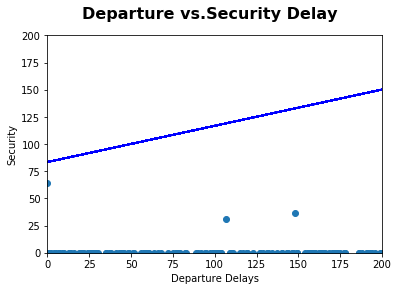

In [44]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Security Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Security")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [45]:
# Set data
x_axis = JFK_check_reason['Departure delay (Minutes)']
print(x_axis)
y_axis = JFK_check_reason['Delay Late Aircraft Arrival (Minutes)']

0          4.0
1        940.0
2         28.0
3        999.0
4       1452.0
         ...  
998     1108.0
999     3278.0
1000     248.0
1001     397.0
1002      19.0
Name: Departure delay (Minutes), Length: 1003, dtype: float64


In [46]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

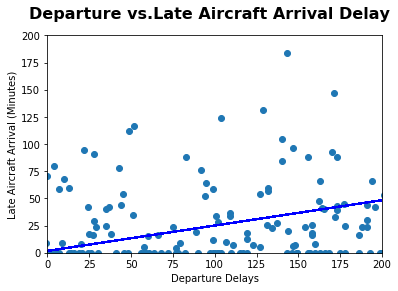

In [48]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Late Aircraft Arrival Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Late Aircraft Arrival (Minutes)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()